# Analysis and Visualization of the NEET Population (15-24 years)

**Author:** Nina and Ligia

**Data Source:** `people_14_25_2023_2024_fullvars.csv`

**Objective:** This notebook analyzes microdata from the PNAD Contínua for Q4 2024, calculates the total NEET population and breaks it down by gender, and generates a chart to visualize the results.

ano — interview year (e.g., 2023, 2024, 2025).
Source: IBGE

trimestre — reference quarter (1 to 4).
Source: IBGE

id_uf — numeric code of the Federative Unit (state) (11=RO … 53=DF). For abbreviation/name, join with br_bd_diretorios_brasil.uf.
Source: Base dos Dados

V1022 – Dwelling location (urban/rural): 1=Urban, 2=Rural.
Source: IBGE (FTP docs)

V2007 – Sex: 1=Male, 2=Female.
Source: IBGE

V2009 – Age: completed years.
Source: IBGE

V2010 – Race/Color: 1=White, 2=Black, 3=Asian (Yellow), 4=Brown (Pardo), 5=Indigenous, 9=Ignored/Not declared.
Source: IBGE

V3002 – Attends school/course? 1=Yes, 2=No (basis for the “E” in NEET).
Source: IBGE

VD4002 – Labor force status in the reference week (derived): 1=Employed, 2=Unemployed, 3=Out of the labor force (basis for the “T” in NEET: not employed).
Source: IBGE (FTP docs)

V4032 – Contributes to a social security institute for this job? 1=Yes, 2=No (asked of employed; “not applicable” if not employed).
Source: IBGE (FTP docs)

VD4019 – Usual earnings from all jobs (derived): monthly nominal income (currency values).
Source: IBGE (FTP docs)

V1028 – Sample weight: historical “household/person weight” with corrections and post-stratification.
Note: for person-level analyses, the more common weight is V1032 (final weight) (and its replicate weights for variance).
Source: IBGE

### 1. Import Libraries

First, we import the necessary libraries for the analysis: `pandas` for data manipulation and `matplotlib` for creating charts.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

print("Libraries imported successfully!")

Libraries imported successfully!


### 2. Load the Data

Now, let's load our pre-processed CSV file into a pandas DataFrame. The script checks if the file exists before attempting to load it.

In [39]:
input_filename = 'people_14_25_2023_2024_fullvars.csv'

if not os.path.exists(input_filename):
    print(f"\nError: The input file '{input_filename}' was not found.")
    print("Please make sure the file is in the same folder as this notebook.")
else:
    try:
        print(f"Loading data from '{input_filename}'...")
        df = pd.read_csv(input_filename)
        print("Data loaded successfully!")
        # Display the first few rows for verification
        display(df.head())
    except Exception as e:
        print(f"\nError: Could not read the file '{input_filename}'. It might be corrupted. Error: {e}")

Loading data from 'people_14_25_2023_2024_fullvars.csv'...
Data loaded successfully!


,Year,Quarter,id_uf,UF,UF_name,Area_code,Area_label,Sex_code,Sex_label,Age,Race_code,Race_label,School_code,School_label,Occupation_code,Occupation_label,Contributor_code,Contributor_label,Income_all_jobs,Weight_V1028
0,2023,4,33,RJ,Rio de Janeiro,1,Urban,1,Male,14,4,Mixed-race,1,Yes,NaN,NaN,NaN,NaN,NaN,886.725662
1,2023,4,33,RJ,Rio de Janeiro,1,Urban,1,Male,15,1,White,1,Yes,NaN,NaN,NaN,NaN,NaN,807.393625
2,2023,3,33,RJ,Rio de Janeiro,1,Urban,1,Male,19,2,Black,2,No,NaN,NaN,NaN,NaN,NaN,751.586947
3,2023,3,33,RJ,Rio de Janeiro,2,Rural,1,Male,14,4,Mixed-race,1,Yes,NaN,NaN,NaN,NaN,NaN,84.368352
4,2023,4,33,RJ,Rio de Janeiro,1,Urban,1,Male,18,1,White,1,Yes,2.0,Unemployed,NaN,NaN,NaN,116.238612


### 3. Filter Data for Analysis

Let's focus our analysis on the relevant data:
1.  **Period:** Q4 2024.
2.  **Age:** Young people between 15 and 24 years old.

In [40]:
print("Filtering data for Q4 2024 and age between 15-24 years...")

# Filter by the specific year and quarter
df_periodo = df[(df['Year'] == 2024) & (df['Quarter'] == 4)].copy()

# Filter by the target age group
df_age = df_periodo[(df_periodo['Age'] >= 15) & (df_periodo['Age'] <= 24)].copy()


Filtering data for Q4 2024 and age between 15-24 years...


In [41]:
print(df_age['Weight_V1028'])

322056    546.373966
322062    477.703016
322068    420.512083
322073    316.385832
322075     91.081650
             ...    
637916    478.468009
637917    109.935601
637918    278.738421
637927    583.323483
637928    166.561713
Name: Weight_V1028, Length: 64218, dtype: float64


### 4. Identify NEET Population and Calculate Totals

In this step, we apply the NEET definition to filter individuals who are not studying and not working. Then, we use the sample weights (`Weight_V1028`) to estimate the actual population and print the results.

The Weight_V1028 column contains the sample weights, or expansion factors. Since the PNAD survey is based on a statistical sample, not the entire population, each record is assigned a weight that indicates how many people it represents in the total population. By summing these weights for our filtered group (the NEETs), we are extrapolating from the sample to get a statistically valid estimate of the total number of NEETs nationwide. Simply counting the rows would only give us the number of NEETs in the sample itself, not the population estimate we need.

In [ ]:
print("Identifying the NEET population and calculating totals...")

# Identify NEET individuals
df_neet = df_age[
    (df_age['School_label'] == 'No') &
    (df_age['Occupation_label'] != 'Employed')
].copy()

# Calculate totals using the sample weights ('Weight_V1028')
total_jovens = df_age['Weight_V1028'].sum()
total_neet = df_neet['Weight_V1028'].sum()
men_neet = df_neet[df_neet['Sex_label'] == 'Male']['Weight_V1028'].sum()
women_neet = df_neet[df_neet['Sex_label'] == 'Female']['Weight_V1028'].sum()

# Calculate percentage
percentagem_neet = (total_neet / total_jovens) * 100 if total_jovens > 0 else 0

print("\n--- Results for Q4 2024 (15-24 years old) ---")
print(f"Total Youth Population: {total_jovens:,.0f}")
print(f"Total NEET Youth: {total_neet:,.0f} ({percentagem_neet:.1f}%)")
print(f"  - NEET Men: {men_neet:,.0f}")
print(f"  - NEET Women: {women_neet:,.0f}")

IndentationError: unexpected indent (2466219407.py, line 5)

The IBGE didn't interview everyone in Brazil. That would be a census. Instead, they interviewed a smaller, representative group of people. This is called a sample.

Each person in the sample represents more than just themselves. They also represent a certain number of other people in the real world with similar characteristics (same age, gender, location, etc.).

The Weight_V1028 column is that number. It's a statistical "expansion factor" that tells us how many people in the entire population of Brazil this one interviewed person represents.

### 5. Generate Chart

Finally, we create a bar chart to visualize the distribution of the NEET population, including the total and the breakdown by gender.


Generating the chart...


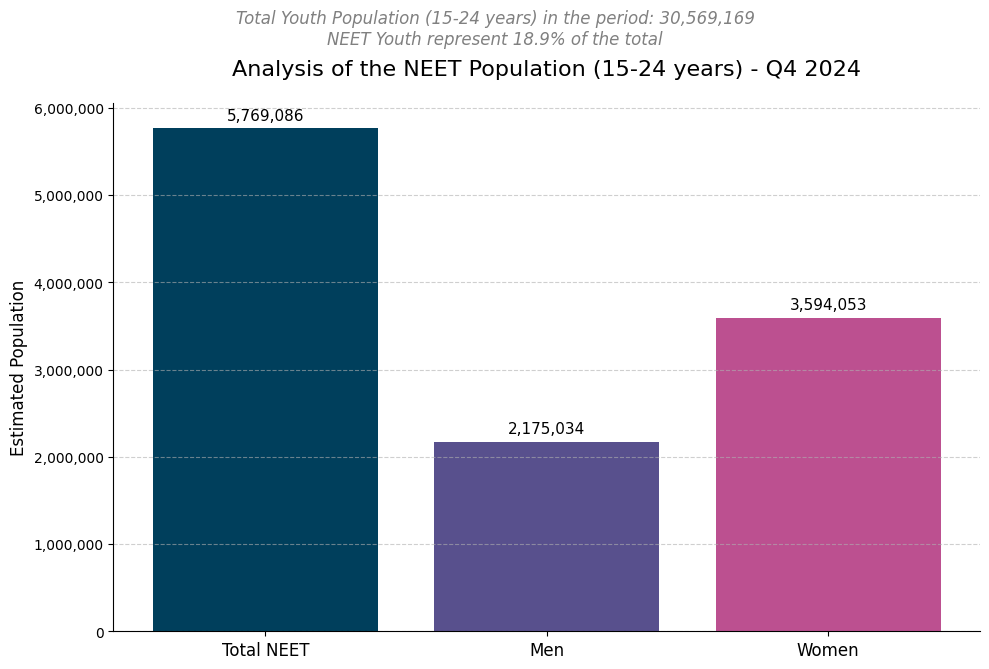

In [ ]:
print("\nGenerating the chart...")

# Data for the chart
categories = ['Total NEET', 'Men', 'Women']
valores = [total_neet, men_neet, women_neet]
color = ['#003f5c', '#58508d', '#bc5090']

fig, ax = plt.subplots(figsize=(10, 7))

# Create the bars
bars = ax.bar(categories, valores, color=color)

# Add title and labels
ax.set_title('Analysis of the NEET Population (15-24 years) - Q4 2024', fontsize=16, pad=20)
ax.set_ylabel('Estimated Population', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x))))

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + (max(valores) * 0.01), f'{yval:,.0f}', ha='center', va='bottom', fontsize=11)

# Add summary text below the title
summary_text = (
    f"Total Youth Population (15-24 years) in the period: {total_jovens:,.0f}\n"
    f"NEET Youth represent {percentagem_neet:.1f}% of the total"
)
fig.text(0.5, 0.9, summary_text, ha='center', fontsize=12, style='italic', color='gray')

plt.tight_layout(rect=[0, 0, 1, 0.9]) # Adjust layout to make space for text
plt.show()

### 6. State Level Comparison

Now, let's group the NEET population by state (`UF_name`) to see the distribution across the country. We will display a data table and then create a horizontal bar chart for better visualization.

Calculating NEET population by state...

--- Estimated NEET Population (15-24 years) by State - Q4 2024 ---


,NEET Population
UF_name,
São Paulo,"918,470"
Bahia,"486,549"
Minas Gerais,"458,919"
Rio de Janeiro,"441,531"
Pernambuco,"369,626"
Maranhão,"351,715"
Ceará,"342,231"
Pará,"329,467"
Paraná,"210,725"



Generating the chart for state comparison...


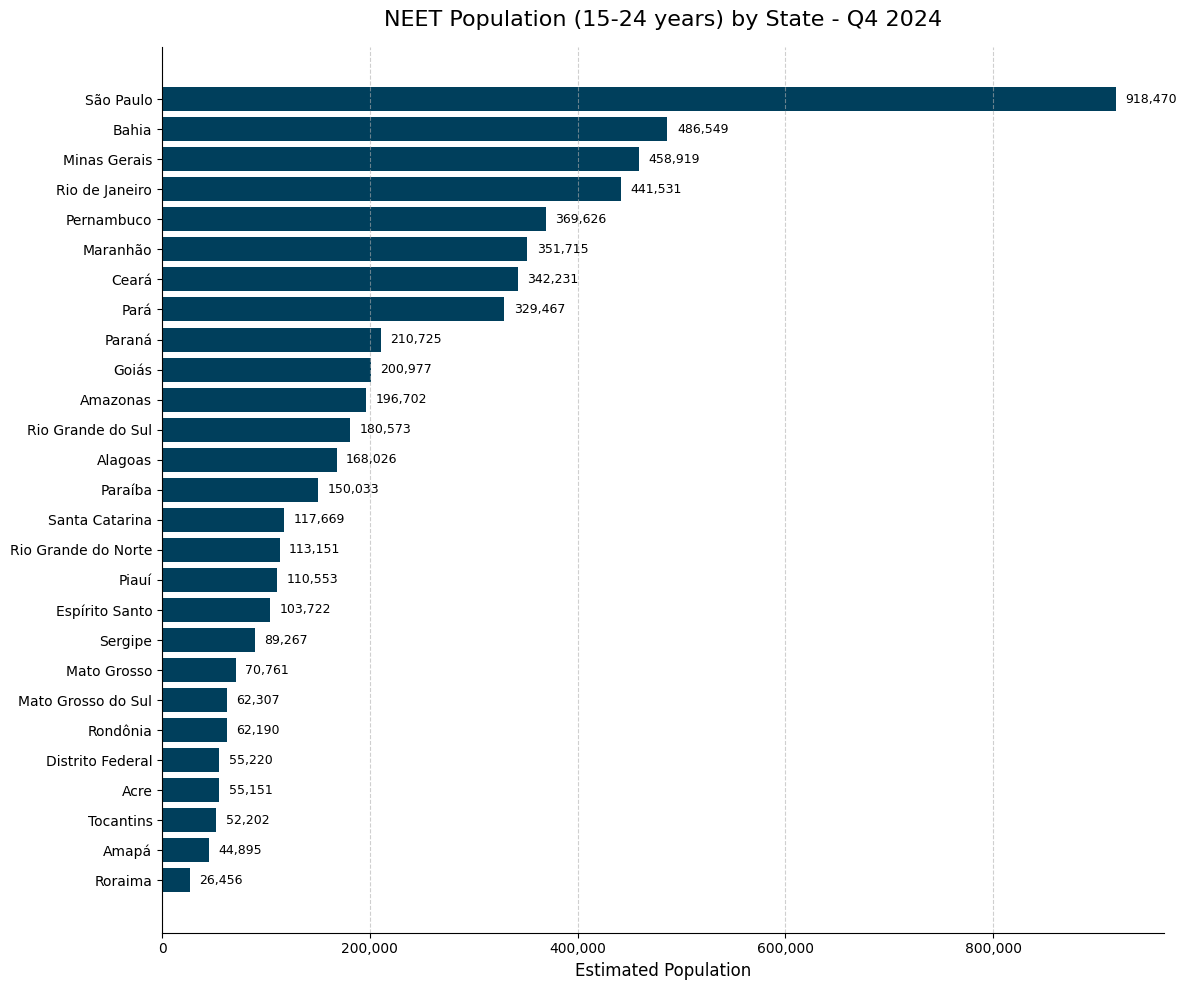

In [ ]:
print("Calculating NEET population by state...")

# Group by state and sum the weights to get the estimated population
neet_by_state = df_neet.groupby('UF_name')['Weight_V1028'].sum().sort_values(ascending=False)

# Display the data table for states
print("\n--- Estimated NEET Population (15-24 years) by State - Q4 2024 ---")
display(neet_by_state.apply('{:,.0f}'.format).to_frame(name='NEET Population'))

# --- Generate Chart for State Comparison ---
print("\nGenerating the chart for state comparison...")

fig_state, ax_state = plt.subplots(figsize=(12, 10)) # Taller figure for all states

# Create horizontal bars for better readability
ax_state.barh(neet_by_state.index, neet_by_state.values, color='#003f5c')

# Add title and labels
ax_state.set_title('NEET Population (15-24 years) by State - Q4 2024', fontsize=16, pad=15)
ax_state.set_xlabel('Estimated Population', fontsize=12)
ax_state.invert_yaxis()  # To display the highest value on top

# Formatting
ax_state.xaxis.grid(True, linestyle='--', alpha=0.6)
ax_state.spines['top'].set_visible(False)
ax_state.spines['right'].set_visible(False)
ax_state.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x))))

# Add data labels to the right of the bars
for i, v in enumerate(neet_by_state.values):
    ax_state.text(v + (neet_by_state.values.max() * 0.01), i, f'{v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### 7. State Level Comparison by Percentage

The absolute number of NEETs can be misleading since states like São Paulo have a much larger population. A more insightful analysis is to calculate the **percentage of young people who are NEETs** within each state. This normalizes the data and reveals the states with the highest NEET *rate*.

Calculating NEET percentage by state...

--- NEET Rate (%) by State for Youth (15-24) - Q4 2024 ---


,Total_Youth_Population,NEET_Population,NEET_Rate_Percent
UF_name,,,
Acre,1.720869e+05,55151.471296,32.048621
Alagoas,5.676325e+05,168025.891024,29.601174
Maranhão,1.210016e+06,351714.509071,29.066937
Amapá,1.581624e+05,44894.680568,28.385186
Pernambuco,1.425732e+06,369626.438120,25.925372
Ceará,1.324243e+06,342230.823363,25.843500
Amazonas,7.744324e+05,196701.710994,25.399467
Paraíba,6.050176e+05,150032.517651,24.798043
Roraima,1.093301e+05,26456.248157,24.198501



Generating the chart for state comparison by percentage...


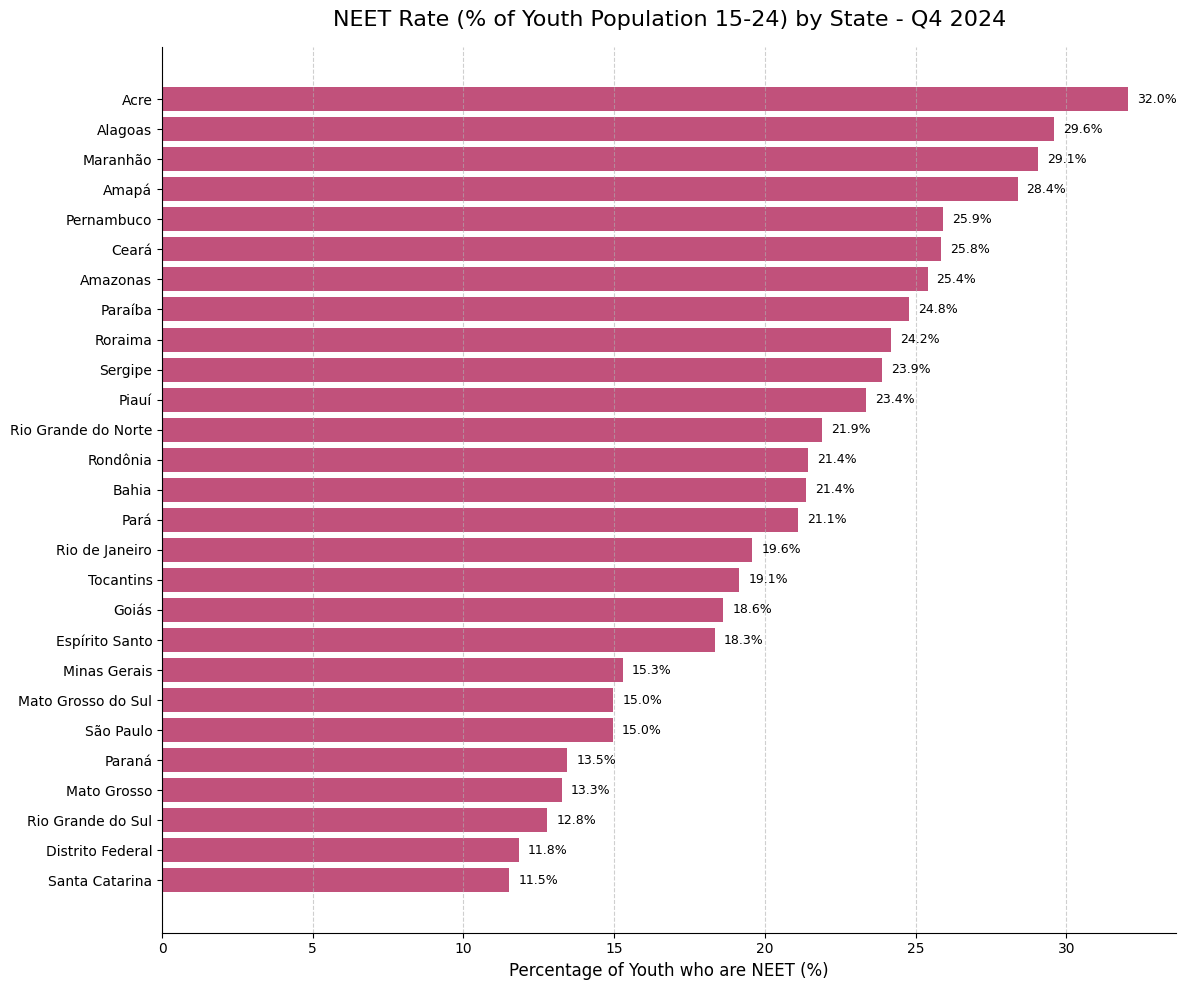

In [ ]:
print("Calculating NEET percentage by state...")

# Step 1: Calculate the total youth population (15-24) for each state
total_youth_by_state = df_ageroupby('UF_name')['Weight_V1028'].sum()

# Step 2: Calculate the total NEET population for each state
neet_by_state = df_neet.groupby('UF_name')['Weight_V1028'].sum()

# Step 3: Combine them into a new DataFrame for comparison
df_state_comparison = pd.DataFrame({
    'Total_Youth_Population': total_youth_by_state,
    'NEET_Population': neet_by_state
})

# Step 4: Calculate the NEET rate (percentage)
df_state_comparison['NEET_Rate_Percent'] = \
    (df_state_comparison['NEET_Population'] / df_state_comparison['Total_Youth_Population']) * 100

# Sort the DataFrame by the NEET rate to find the states with the highest proportion
df_state_comparison_sorted = df_state_comparison.sort_values(by='NEET_Rate_Percent', ascending=False)

# Display the resulting data table (without special formatting)
print("\n--- NEET Rate (%) by State for Youth (15-24) - Q4 2024 ---")
display(df_state_comparison_sorted)


# --- Generate Chart for State Comparison by Percentage ---
print("\nGenerating the chart for state comparison by percentage...")

fig_rate, ax_rate = plt.subplots(figsize=(12, 10))

# Get the data for plotting
states = df_state_comparison_sorted.index
rates = df_state_comparison_sorted['NEET_Rate_Percent']

# Create horizontal bars
ax_rate.barh(states, rates, color='#c1517b')

# Add title and labels
ax_rate.set_title('NEET Rate (% of Youth Population 15-24) by State - Q4 2024', fontsize=16, pad=15)
ax_rate.set_xlabel('Percentage of Youth who are NEET (%)', fontsize=12)
ax_rate.invert_yaxis()  # To display the highest rate on top

# Formatting
ax_rate.xaxis.grid(True, linestyle='--', alpha=0.6)
ax_rate.spines['top'].set_visible(False)
ax_rate.spines['right'].set_visible(False)

# Add data labels to the right of the bars
for i, v in enumerate(rates):
    ax_rate.text(v + 0.3, i, f'{v:.1f}%', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

### 8. Deep Dive: Gender and Race Analysis in North & Northeast Regions

Given that the highest NEET rates are concentrated in the North and Northeast, let's investigate the demographic profile of NEETs in these specific regions. This cross-analysis of gender and race will help us understand *who* is most affected where the problem is most severe.

In [ ]:
# Define the states belonging to the North and Northeast regions 
north_northeast_states = [
    # North Region
    'Amazonas', 'Pará', 'Acre', 'Rondônia', 'Roraima', 'Amapá', 'Tocantins',
    # Northeast Region
    'Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 
    'Rio Grande do Norte', 'Sergipe'
]

# Filter our NEET dataframe to only include these states
df_neet_regions = df_neet[df_neet['UF_name'].isin(north_northeast_states)].copy()

if df_neet_regions.empty:
    print("No NEET data found for the selected North and Northeast states.")
else:
    # Group by Race and Gender, then sum the weights to get the population estimate
    regional_analysis = df_neet_regions.groupby(['Race_label', 'Sex_label'])['Weight_V1028'].sum()
    
    # Reformat the data for easier plotting (pivot)
    regional_analysis_pivot = regional_analysis.unstack()

    print("\n--- Estimated NEET Population by Race and Gender in N/NE Regions (Q4 2024) ---")
    display(regional_analysis_pivot.applymap('{:,.0f}'.format))

    # --- Generate Chart for the Regional Deep Dive ---
    print("\nGenerating chart for the regional deep dive...")
    
    ax = regional_analysis_pivot.plot(
        kind='bar', 
        figsize=(14, 8),
        color={'Male': '#58508d', 'Female': '#bc5090'},
        width=0.8
    )

    # Add titles and labels
    ax.set_title('NEET Population Profile in High-Rate Regions (North & Northeast)', fontsize=16, pad=20)
    ax.set_ylabel('Estimated Population')
    ax.set_xlabel('Race / Color')
    ax.tick_params(axis='x', labelrotation=45)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x))))
    
    # Add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=3)

    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()